# END TO END TOY PROJECT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('placement.csv')

In [3]:
data.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

**0. Prepsocessing + EDA + Feature Selection**

In [5]:
data = data.iloc[:, 1:]
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


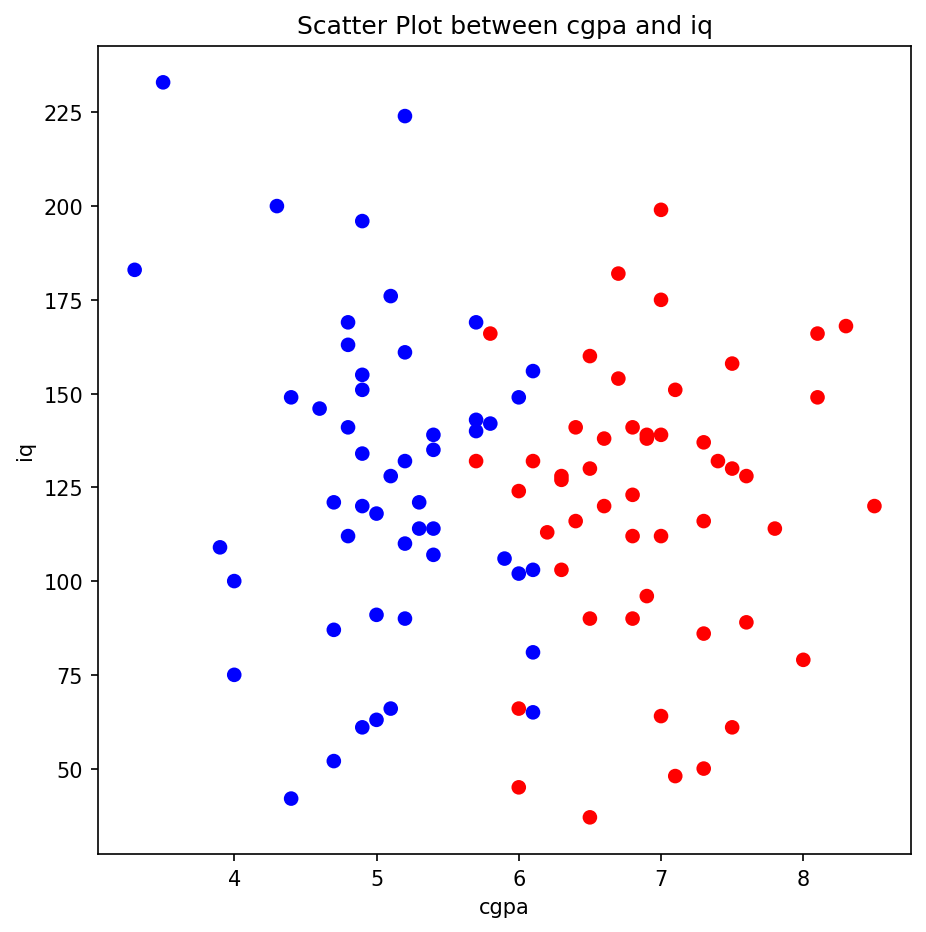

In [6]:
plt.figure(
    figsize=(7, 7),
    dpi=150,
)

colors = ["red" if placement == 1 else "blue" for placement in data["placement"]]

plt.title("Scatter Plot between cgpa and iq")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.scatter(
    data["cgpa"],
    data["iq"],
    color=colors,
)


plt.show()

**1. Extract input and output cols**

In [7]:
# input
X = data.iloc[:, 0:2]
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [8]:
# output 
y = data.iloc[:, -1]
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

*Note: Step 2 and 3 are interchangable*

**2. Train test split**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [11]:
X_test.head()

,cgpa,iq
93,6.8,112.0
62,6.0,102.0
98,6.3,103.0
5,7.1,48.0
74,6.7,154.0


**3. Scale the values**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

*Use fit_transform() only on the training data to compute and apply scaling. Use transform() on the test data (or any new data) to ensure consistent scaling using the same parameters.*

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**4. Train the Model**

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()

*model.fit(X, y) computes the optimal coefficients for the logistic regression model based on the dataset X and y*

In [17]:
# Training model
clf.fit(X_train, y_train)

LogisticRegression()

**5. Evaluate the model/model selection**

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_test

93    1
62    0
98    1
5     1
74    1
58    1
41    0
47    0
26    1
31    0
Name: placement, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, y_pred)

0.9

In [22]:
import pickle

In [24]:
pickle.dump(clf, open('placement_prediction.pkl', 'wb'))